<a href="https://colab.research.google.com/github/DataBioExplorer/Calculo_metricas/blob/main/Reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Biblioteca para manipulação de imagens e visão computacional
import cv2

# Biblioteca para redimensionamento e rotação de imagens
import imutils

# Biblioteca para manipulação numérica e processamento de arrays
import numpy as np

# Para exibir imagens no Google Colab
from google.colab.patches import cv2_imshow

# Para capturar vídeo da webcam no Google Colab
from IPython.display import display, Javascript
from google.colab.output import eval_js

# Biblioteca para decodificar dados binários em base64
from base64 import b64decode

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    """
    Captura uma foto usando a webcam no Google Colab e salva como um arquivo JPEG.

    Parâmetros:
        filename (str): Nome do arquivo onde a foto será salva.
        quality (float): Qualidade da imagem (0 a 1).

    Retorna:
        str: Nome do arquivo salvo.
    """

    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capturar';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Ajusta a altura do iframe para acomodar o vídeo
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Aguarda o clique no botão de captura
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop(); // Para a transmissão de vídeo
        div.remove(); // Remove os elementos criados

        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')

    display(js)
    data = eval_js(f'takePhoto({quality})')  # Uso de f-string para maior clareza

    # Decodifica a imagem capturada e sa

In [ ]:
from IPython.display import Image

# Captura a foto e exibe a imagem
image_file = take_photo()
display(Image(image_file))

<IPython.core.display.Javascript object>

ValueError: No image data found. Expecting filename, url, or data.

<IPython.core.display.Javascript object>

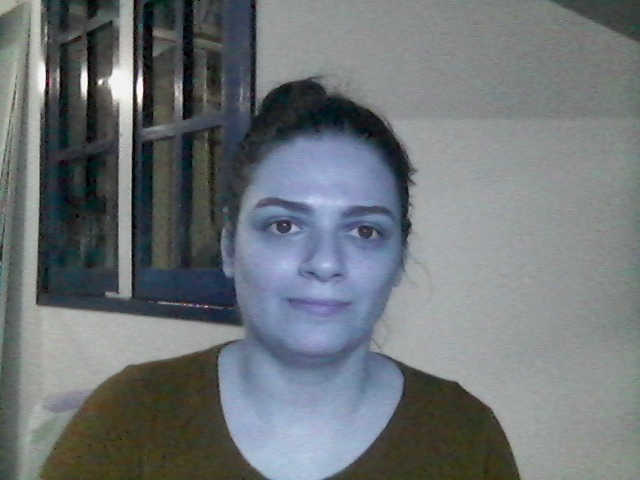

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import PIL.Image
import io
import base64

# Código JavaScript para acessar a webcam
def take_photo():
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Capturar';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Espera pelo clique do botão
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();

            return canvas.toDataURL('image/jpeg');
        }
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = base64.b64decode(data.split(',')[1])

    # Converte a imagem para OpenCV
    image = PIL.Image.open(io.BytesIO(binary))
    img_array = np.array(image)

    return img_array

# Captura e exibe a imagem no Colab
img = take_photo()
cv2_imshow(img)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Carrega o modelo de detecção facial
prototxt_path = "deploy.prototxt"
model_path = "res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

# Redimensiona a imagem para largura máxima de 400 pixels
altura, largura = img.shape[:2]
nova_largura = 400
fator_escala = nova_largura / largura
nova_altura = int(altura * fator_escala)
img = cv2.resize(img, (nova_largura, nova_altura))

# Converte a imagem para blob
(h, w) = img.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# Detecta rostos
net.setInput(blob)
detections = net.forward()

# Desenha retângulos nos rostos detectados
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:  # Define um limiar mínimo de confiança
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Desenha a caixa ao redor do rosto
        cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)

# Exibe a imagem com as detecções
cv2_imshow(img)

error: OpenCV(4.11.0) /io/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt" in function 'ReadProtoFromTextFile'


In [ ]:
import os
print(os.listdir())  # Lista os arquivos do diretório atual

['.config', 'Foto 3x4.jpg', 'sample_data']


In [ ]:
!wget -O deploy.prototxt https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -O res10_300x300_ssd_iter_140000.caffemodel https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2025-02-24 00:05:28--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.001s  

2025-02-24 00:05:28 (18.4 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2025-02-24 00:05:28--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP r

In [ ]:
import os
print(os.listdir())  # Isso mostrará todos os arquivos no diretório atual

['.config', 'res10_300x300_ssd_iter_140000.caffemodel', 'deploy.prototxt', 'Foto 3x4.jpg', 'sample_data']


In [ ]:
import cv2

prototxt_path = "deploy.prototxt"
model_path = "res10_300x300_ssd_iter_140000.caffemodel"

try:
    net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
    print("✅ Modelo carregado com sucesso!")
except cv2.error as e:
    print(f"❌ Erro ao carregar o modelo: {e}")

✅ Modelo carregado com sucesso!


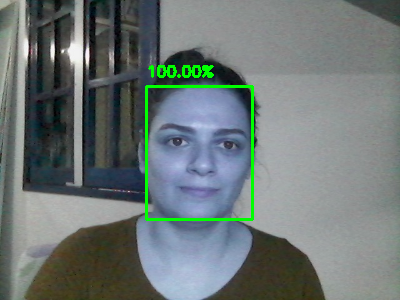

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Carregar modelo DNN do OpenCV
prototxt_path = "deploy.prototxt"
model_path = "res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

# Captura de imagem (supondo que img já foi capturada com take_photo)
# Se img não estiver definido, rode o código da captura antes.

# Redimensiona a imagem para largura máxima de 400 pixels para melhor visualização
altura, largura = img.shape[:2]
if largura > 400:
    escala = 400 / largura
    img = cv2.resize(img, (400, int(altura * escala)))

# Criar um blob a partir da imagem
(h, w) = img.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# Passar o blob pelo modelo para obter detecções
net.setInput(blob)
detections = net.forward()

# Loop pelas detecções
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]  # Confiança da detecção
    if confidence > 0.5:  # Ajuste o limiar de confiança conforme necessário
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Desenhar um retângulo ao redor do rosto detectado
        cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
        text = f"{confidence*100:.2f}%"
        cv2.putText(img, text, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Exibir a imagem com os rostos detectados
cv2_imshow(img)